In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


c:\python\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '0+unknown' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('haberman.csv')

In [3]:
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.status.value_counts()

1    225
2     81
Name: status, dtype: int64

### Simple Scatter Plot

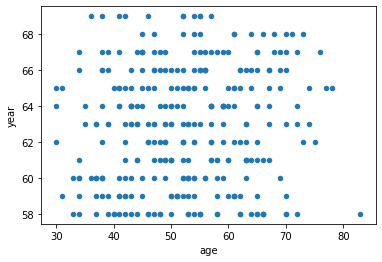

In [7]:
df.plot(kind='scatter', x='age', y='year')
plt.show()

### Scatter Plot with color 

c:\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


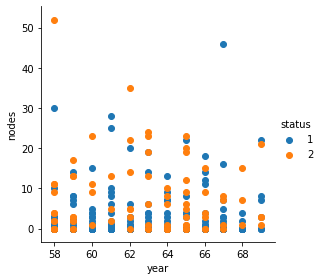

In [8]:
sns.FacetGrid(df, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

In [9]:
plt.close()

### Pair Plot

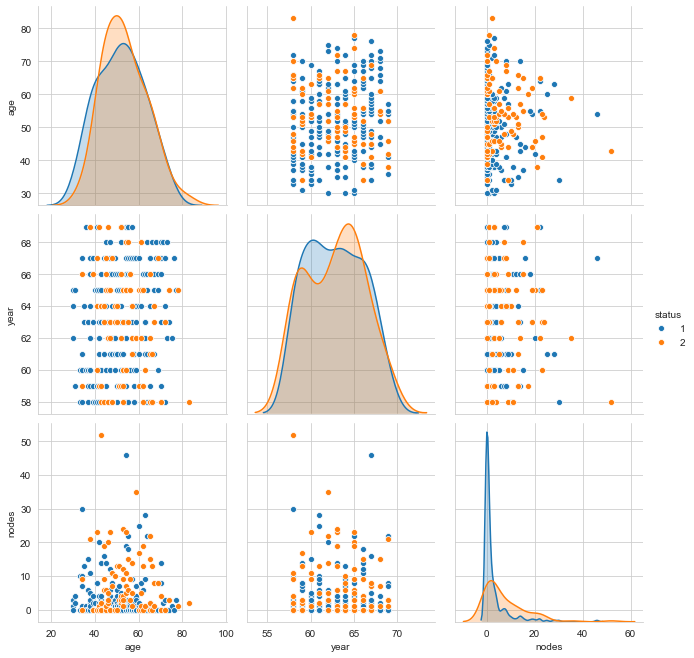

In [10]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='status', height=3)
plt.show()

### Observation

All the features are overlapping intrepratibility become less.

The data is not linearly separable.

Harder Vizulaization.

Only the nodes is the kind of valid features from where we can get some kind of information of survival.

Complex maths required.

### PDF

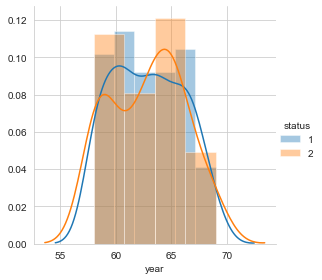

In [11]:
sns.FacetGrid(df, hue="status", height=4) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

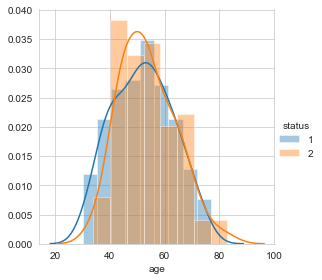

In [12]:
sns.FacetGrid(df, hue="status", height=4) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

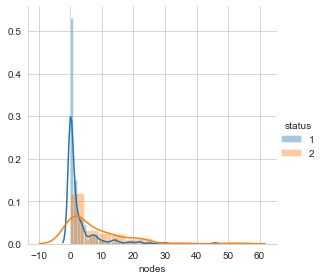

In [13]:
sns.FacetGrid(df, hue="status", height=4) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Observations -

1) If people having less than or equal to zero (actually zero) so that we can say that they survive longer with no worry.

2) Between 0 to 4(approx) nodes survival rate is good enough.

3) After 4 nodes survival rate is low so less chances of alive.

### CDF

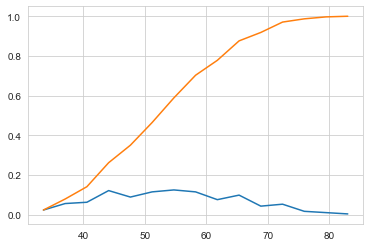

In [14]:
counts, bin_edges = np.histogram(df['age'], bins=15, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

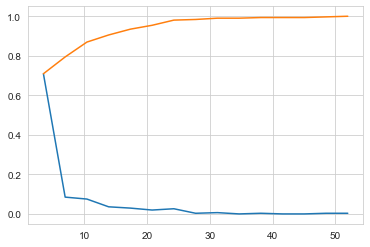

In [15]:
counts, bin_edges = np.histogram(df['nodes'], bins=15, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

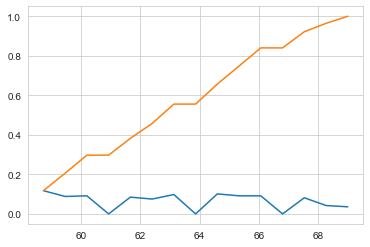

In [16]:
counts, bin_edges = np.histogram(df['year'], bins=15, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

### Observations

1) You can easily that there is lot of zig-zag motion in pdf of each plot which is not easily intrepratable

2) But in case of nodes you can see that there is sudden declined in the pdf from its starting point so that the things we saw in pair plot also.

3) And in case of Age we can see some gaussian behaviour beacause it can easily found in nature.

### Box Plots

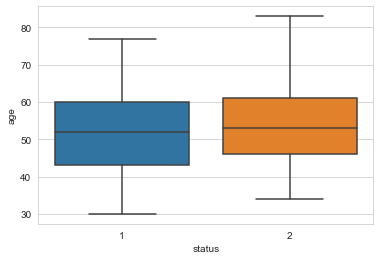

In [17]:
sns.boxplot(x='status', y='age', data=df)
plt.show()

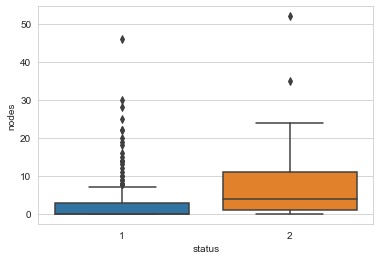

In [18]:
sns.boxplot(x='status', y='nodes', data=df)
plt.show()

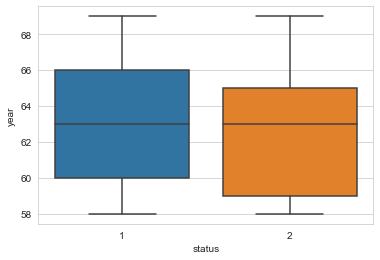

In [19]:
sns.boxplot(x='status', y='year', data=df)
plt.show()

### Observations

1) Age and Year can not be intrepratable from box plot due to overlapping features.

2) But in Nodes we can see some abnormality due to lots of outlier in status 1 data (survival longer)

### Violin Plots

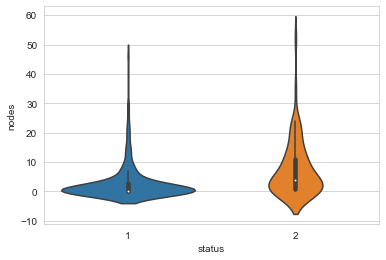

In [20]:
sns.violinplot(x='status', y='nodes', data=df, size=10)
plt.show()

### Observations

Same thing we observe from box-plot also here.

### Joint Plot

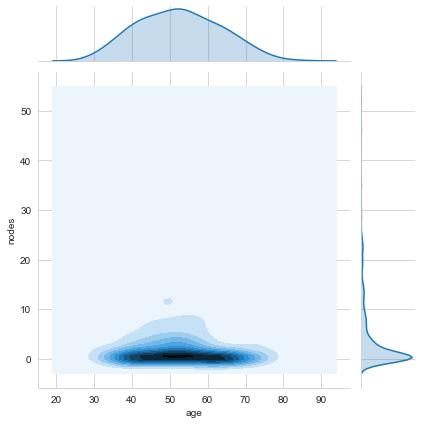

In [21]:
sns.jointplot(x="age", y="nodes", data=df, kind="kde");
plt.show();

### Observation

Most of them from age of 45 to 60 and 0- 4 nodes for longer survival.